# **ENCONTRAR MODELOS QUE CUMPLAN LOS SUPUESTOS**

(1) ARIMA(4,0,0)(1,0,1)[12], AIC=3963.079  
(2) ARIMA(4,0,0)(2,0,1)[12], AIC=3964.900  
(3) ARIMA(4,0,0)(1,0,2)[12], AIC=3965.097  
(4) ARIMA(4,0,1)(1,0,1)[12], AIC=3965.197  
(5) ARIMA(5,0,0)(1,0,1)[12], AIC=3969.811  
(6) ARIMA(3,0,0)(1,0,1)[12], AIC=3976.458  
(7) ARIMA(3,0,0)(1,0,2)[12], AIC=3978.399  
(8) ARIMA(3,0,0)(2,0,1)[12], AIC=3978.409  
(9) ARIMA(2,0,0)(1,0,1)[12], AIC=3979.726  
(10) ARIMA(2,0,0)(1,0,2)[12], AIC=3981.646  
(11) ARIMA(2,0,0)(2,0,1)[12], AIC=3981.660  
(12) ARIMA(1,0,0)(1,0,1)[12], AIC=3983.519  
(13) ARIMA(1,0,0)(1,0,2)[12], AIC=3985.469  
(14) ARIMA(1,0,0)(2,0,1)[12], AIC=3985.479  
(15) ARIMA(4,0,0)(2,0,0)[12], AIC=3998.322  
(16) ARIMA(3,0,0)(2,0,0)[12], AIC=4011.744  
(17) ARIMA(2,0,0)(2,0,0)[12], AIC=4015.043  
(18) ARIMA(1,0,0)(2,0,0)[12], AIC=4020.549  
(19) ARIMA(4,0,0)(1,0,0)[12], AIC=4034.057  
(20) ARIMA(4,0,0)(0,0,2)[12], AIC=4038.271  
(21) ARIMA(0,0,0)(1,0,1)[12], AIC=4042.135  
(22) ARIMA(4,0,0)(0,0,1)[12], AIC=4051.497  
(23) ARIMA(3,0,0)(1,0,0)[12], AIC=4060.689  
(24) ARIMA(2,0,0)(1,0,0)[12], AIC=4068.635  
(25) ARIMA(1,0,0)(1,0,0)[12], AIC=4071.776  
(26) ARIMA(4,0,0)(0,0,0)[12], AIC=4082.110  
(27) ARIMA(3,0,0)(0,0,2)[12], AIC=4082.936  
(28) ARIMA(3,0,0)(0,0,1)[12], AIC=4103.753  
(29) ARIMA(2,0,0)(0,0,2)[12], AIC=4107.673  
(30) ARIMA(1,0,0)(0,0,2)[12], AIC=4107.876  
(31) ARIMA(1,0,0)(0,0,1)[12], AIC=4135.332  
(32) ARIMA(2,0,0)(0,0,1)[12], AIC=4137.331  
(33) ARIMA(3,0,0)(0,0,0)[12], AIC=4157.272  
(34) ARIMA(0,0,1)(0,0,1)[12], AIC=4190.035  
(35) ARIMA(2,0,0)(0,0,0)[12], AIC=4217.832  
(36) ARIMA(1,0,0)(0,0,0)[12], AIC=4224.664  
(37) ARIMA(0,0,0)(0,0,0)[12], AIC=4561.998  

## **Cargar los datos**

In [ ]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer
import numpy as np

data=pd.read_csv('MXN00021035.csv')

pre=data.iloc[:,6]  # Precipitacion, es la columna 5
date=data.iloc[:,5] # Date, es la columna 6
date = date.astype(str).str.replace(r'(\d{4})(\d{2})', r'\1/\2', regex=True)    # La fecha está como 195210 y la pasamos a 1952/10 
date = pd.to_datetime(date, format='%Y/%m')                                     # Lo convertimos en fecha
pre = pd.Series(pre.values, index=date)                                         # Creamos una Serie

X = pre.values.reshape(-1, 1)

# Ajuste original para obtener lambda estimado
pt = PowerTransformer(method='yeo-johnson', standardize=False)
ypre = pt.fit_transform(X)
lambda_est = pt.lambdas_[0]

# Partir la serie para train y test
ypre_total = ypre.copy()          # Copia de la serie original

# Todas hasta los ultimos 12 meses
ypre = ypre_total[:-12]           # Entrenamiento: todos menos los últimos 12 meses
ypre_test = ypre_total[-12:]      # Test: últimos 12 meses

# **MODELADO**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from modulo_raices import * # Una funcion que hice para verificar si los parametros son estacionarios/invertibles

In [162]:
alpha = 0.10

In [167]:
def parsimonia():
    if np.any(modelo.pvalues > alpha):
        print("Hay coeficientes no significativos, no se cumple el principio de parsimonia")
    else:
        print(":)")

## **1° Modelo con mejor AIC**

In [106]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(1, 0, [1], 12)   Log Likelihood                -592.256
Date:                              Thu, 24 Apr 2025   AIC                           1200.512
Time:                                      15:30:42   BIC                           1236.594
Sample:                                           0   HQIC                          1214.486
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7104      0.008    203.239      0.000       1.694       1.727
ar.L2         -0.9855      0.009   -115.453      0.000      -1.002      -0.969
ma.L1         -1.4789      0.034    -43.322      0.000      -1.546      -1.412
ma.L2          0.7053      0.058     12.183      0.000       0.592       0.819
ma.L3          0.0654      0.037      1.776      0.076      -0.007       0.138
ar.S.L12       0.8781      0.089      9.875      0.000       0.704       1.052
ma.S.L12      -0.8070      0.108     -7.464      0.000      -1.019      -0.595
sigma2         0.3391      0.017     19.859      0.000       0.306       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.71
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

In [107]:
# Verificamos estacianariedad (los parametros AR se ponen con *-1)
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p12=-modelo.params[5])

Raíces del polinomio característico: [-1.13999905+0.j         -0.94913078+0.61447189j -0.94913078-0.61447189j
 -0.45160125+1.00423108j -0.45160125-1.00423108j  0.15341033+1.03336803j
  0.15341033-1.03336803j  0.60127671+0.72420125j  0.60127671-0.72420125j
  0.90329376+0.j          0.76439765+0.39186877j  0.76439765-0.39186877j]

Módulo de las raíces: [1.13999905 1.13067456 1.13067456 1.10110116 1.10110116 1.04469336
 1.04469336 0.94127633 0.94127633 0.90329376 0.85899063 0.85899063]

¿Las raíces están fuera del circulo unitario?  False


## **2° Modelo con mejor AIC**

In [108]:
modelo=SARIMAX(ypre,
               order=(3,0,2),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(3, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -592.456
Date:                              Thu, 24 Apr 2025   AIC                           1200.912
Time:                                      15:30:45   BIC                           1236.994
Sample:                                           0   HQIC                          1214.886
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7808      0.048     36.753      0.000       1.686       1.876
ar.L2         -1.1077      0.080    -13.788      0.000      -1.265      -0.950
ar.L3          0.0723      0.045      1.618      0.106      -0.015       0.160
ma.L1         -1.5497      0.032    -48.112      0.000      -1.613      -1.487
ma.L2          0.8196      0.031     26.545      0.000       0.759       0.880
ar.S.L12       0.9016      0.074     12.141      0.000       0.756       1.047
ma.S.L12      -0.8374      0.093     -9.017      0.000      -1.019      -0.655
sigma2         0.3399      0.017     19.830      0.000       0.306       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.54
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [168]:
parsimonia()

:)


In [109]:
# Verificamos estacianariedad (los parametros AR se ponen con *-1)
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p3=-modelo.params[2], p12=-modelo.params[5])

Raíces del polinomio característico: [-1.1455043 +0.j         -0.95007199+0.62042858j -0.95007199-0.62042858j
 -0.44518383+1.00729677j -0.44518383-1.00729677j  0.1591763 +1.028072j
  0.1591763 -1.028072j    0.59886647+0.71795083j  0.59886647-0.71795083j
  0.89610399+0.j          0.7619132 +0.38851343j  0.7619132 -0.38851343j]

Módulo de las raíces: [1.1455043  1.13471072 1.13471072 1.10128808 1.10128808 1.04032165
 1.04032165 0.93493018 0.93493018 0.89610399 0.85525108 0.85525108]

¿Las raíces están fuera del circulo unitario?  False


## **3° Modelo con mejor AIC**

In [110]:
modelo=SARIMAX(ypre,
               order=(2,0,4),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(2, 0, 4)x(1, 0, [1], 12)   Log Likelihood                -592.238
Date:                              Thu, 24 Apr 2025   AIC                           1202.477
Time:                                      15:30:49   BIC                           1243.069
Sample:                                           0   HQIC                          1218.198
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7101      0.008    201.410      0.000       1.693       1.727
ar.L2         -0.9853      0.009   -114.388      0.000      -1.002      -0.968
ma.L1         -1.4791      0.034    -42.950      0.000      -1.547      -1.412
ma.L2          0.7005      0.071      9.887      0.000       0.562       0.839
ma.L3          0.0755      0.079      0.950      0.342      -0.080       0.231
ma.L4         -0.0075      0.044     -0.171      0.864      -0.094       0.079
ar.S.L12       0.8810      0.088      9.972      0.000       0.708       1.054
ma.S.L12      -0.8117      0.109     -7.475      0.000      -1.025      -0.599
sigma2         0.3391      0.017     19.731      0.000       0.305       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.62
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

## **4° Modelo con mejor AIC**

In [112]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(1,0,2,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(1, 0, [1, 2], 12)   Log Likelihood                -592.242
Date:                                 Thu, 24 Apr 2025   AIC                           1202.484
Time:                                         15:30:54   BIC                           1243.076
Sample:                                              0   HQIC                          1218.204
                                                 - 672                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7107      0.008    205.857      0.000       1.694       1.727
ar.L2         -0.9858      0.008   -116.287      0.000      -1.002      -0.969
ma.L1         -1.4788      0.034    -43.349      0.000      -1.546      -1.412
ma.L2          0.7042      0.058     12.116      0.000       0.590       0.818
ma.L3          0.0670      0.037      1.797      0.072      -0.006       0.140
ar.S.L12       0.8867      0.098      9.081      0.000       0.695       1.078
ma.S.L12      -0.8108      0.107     -7.545      0.000      -1.021      -0.600
ma.S.L24      -0.0086      0.046     -0.188      0.851      -0.099       0.081
sigma2         0.3391      0.017     19.810      0.000       0.306       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.84
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

## **5° Modelo con mejor AIC**

In [114]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(2,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(2, 0, [1], 12)   Log Likelihood                -592.243
Date:                              Thu, 24 Apr 2025   AIC                           1202.486
Time:                                      15:30:59   BIC                           1243.078
Sample:                                           0   HQIC                          1218.207
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7106      0.008    205.456      0.000       1.694       1.727
ar.L2         -0.9858      0.008   -116.067      0.000      -1.002      -0.969
ma.L1         -1.4788      0.034    -43.345      0.000      -1.546      -1.412
ma.L2          0.7044      0.058     12.119      0.000       0.590       0.818
ma.L3          0.0668      0.037      1.792      0.073      -0.006       0.140
ar.S.L12       0.8961      0.134      6.703      0.000       0.634       1.158
ar.S.L24      -0.0086      0.050     -0.173      0.863      -0.107       0.089
ma.S.L12      -0.8206      0.130     -6.312      0.000      -1.075      -0.566
sigma2         0.3390      0.017     19.812      0.000       0.305       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.83
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

## **6° Modelo con mejor AIC**

In [170]:
modelo=SARIMAX(ypre,
               order=(3,0,3),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(3, 0, 3)x(1, 0, [1], 12)   Log Likelihood                -592.644
Date:                              Thu, 24 Apr 2025   AIC                           1203.287
Time:                                      15:42:57   BIC                           1243.880
Sample:                                           0   HQIC                          1219.008
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.355      2.816      0.005       0.304       1.695
ar.L2          0.2268      0.604      0.376      0.707      -0.957       1.410
ar.L3         -0.6960      0.346     -2.010      0.044      -1.375      -0.017
ma.L1         -0.7869      0.344     -2.290      0.022      -1.460      -0.114
ma.L2         -0.3361      0.509     -0.660      0.509      -1.334       0.662
ma.L3          0.6013      0.261      2.300      0.021       0.089       1.114
ar.S.L12       0.8875      0.082     10.882      0.000       0.728       1.047
ma.S.L12      -0.8181      0.101     -8.112      0.000      -1.016      -0.620
sigma2         0.3394      0.017     19.824      0.000       0.306       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                13.19
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.24
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [171]:
parsimonia()

Hay coeficientes no significativos, no se cumple el principio de parsimonia


## **7° Modelo con mejor AIC**

In [173]:
modelo=SARIMAX(ypre,
               order=(2,0,2),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -594.618
Date:                              Thu, 24 Apr 2025   AIC                           1203.236
Time:                                      15:43:39   BIC                           1234.808
Sample:                                           0   HQIC                          1215.463
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6961      0.012    146.606      0.000       1.673       1.719
ar.L2         -0.9707      0.012    -83.870      0.000      -0.993      -0.948
ma.L1         -1.5185      0.027    -57.171      0.000      -1.571      -1.466
ma.L2          0.8003      0.028     28.680      0.000       0.746       0.855
ar.S.L12       0.8933      0.064     13.883      0.000       0.767       1.019
ma.S.L12      -0.8023      0.084     -9.534      0.000      -0.967      -0.637
sigma2         0.3416      0.017     19.885      0.000       0.308       0.375
===================================================================================
Ljung-Box (L1) (Q):                   2.01   Jarque-Bera (JB):                15.11
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.28
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [174]:
parsimonia()

:)


In [118]:
# Verificamos estacianariedad (los parametros AR se ponen con *-1)
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p12=-modelo.params[4])

Raíces del polinomio característico: [-1.13733152+0.j         -0.94708913+0.61276389j -0.94708913-0.61276389j
 -0.45119945+1.00161083j -0.45119945-1.00161083j  0.15179376+1.03125106j
  0.15179376-1.03125106j  0.59865836+0.72485731j  0.59865836-0.72485731j
  0.90222474+0.j          0.76538984+0.3924017j   0.76538984-0.3924017j ]

Módulo de las raíces: [1.13733152 1.12803254 1.12803254 1.09854685 1.09854685 1.04236274
 1.04236274 0.94011167 0.94011167 0.90222474 0.86011668 0.86011668]

¿Las raíces están fuera del circulo unitario?  False


## **8° Modelo con mejor AIC**

In [119]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(2,0,2,12)).fit()

modelo.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(2, 0, [1, 2], 12)   Log Likelihood                -592.237
Date:                                 Thu, 24 Apr 2025   AIC                           1204.475
Time:                                         15:31:12   BIC                           1249.577
Sample:                                              0   HQIC                          1221.942
                                                 - 672                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7100      0.008    201.416      0.000       1.693       1.727
ar.L2         -0.9850      0.009   -113.367      0.000      -1.002      -0.968
ma.L1         -1.4780      0.034    -43.273      0.000      -1.545      -1.411
ma.L2          0.7035      0.058     12.107      0.000       0.590       0.817
ma.L3          0.0658      0.037      1.763      0.078      -0.007       0.139
ar.S.L12       0.8004      3.165      0.253      0.800      -5.402       7.003
ar.S.L24       0.0838      2.788      0.030      0.976      -5.382       5.549
ma.S.L12      -0.7225      3.158     -0.229      0.819      -6.913       5.468
ma.S.L24      -0.0911      2.561     -0.036      0.972      -5.110       4.928
sigma2         0.3389      0.017     19.795      0.000       0.305       0.372
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.91
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

## **9° Modelo con mejor AIC**

In [120]:
modelo=SARIMAX(ypre,
               order=(3,0,4),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(3, 0, 4)x(1, 0, [1], 12)   Log Likelihood                -592.256
Date:                              Thu, 24 Apr 2025   AIC                           1204.511
Time:                                      15:31:15   BIC                           1249.614
Sample:                                           0   HQIC                          1221.979
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1558     18.500      0.062      0.950     -35.103      37.414
ar.L2         -0.0369     31.642     -0.001      0.999     -62.054      61.980
ar.L3         -0.5466     18.231     -0.030      0.976     -36.280      35.186
ma.L1         -0.9242     18.500     -0.050      0.960     -37.184      35.336
ma.L2         -0.1141     27.378     -0.004      0.997     -53.773      53.545
ma.L3          0.4548     13.081      0.035      0.972     -25.183      26.093
ma.L4          0.0376      1.192      0.032      0.975      -2.299       2.374
ar.S.L12       0.8778      0.089      9.809      0.000       0.702       1.053
ma.S.L12      -0.8065      0.110     -7.357      0.000      -1.021      -0.592
sigma2         0.3391      0.017     19.828      0.000       0.306       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.71
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

## **10° Modelo con mejor AIC**

In [160]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(1,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(1, 0, [], 12)   Log Likelihood                -595.784
Date:                             Thu, 24 Apr 2025   AIC                           1205.567
Time:                                     15:36:25   BIC                           1237.139
Sample:                                          0   HQIC                          1217.795
                                             - 672                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7167      0.005    324.218      0.000       1.706       1.727
ar.L2         -0.9917      0.006   -177.911      0.000      -1.003      -0.981
ma.L1         -1.4754      0.034    -43.640      0.000      -1.542      -1.409
ma.L2          0.6793      0.057     11.817      0.000       0.567       0.792
ma.L3          0.0944      0.036      2.605      0.009       0.023       0.165
ar.S.L12       0.0948      0.039      2.416      0.016       0.018       0.172
sigma2         0.3429      0.017     19.744      0.000       0.309       0.377
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.07
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.22
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

In [161]:
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p12=-modelo.params[5])

Raíces del polinomio característico: [-1.39938942+0.j         -1.16049648+0.76130013j -1.16049648-0.76130013j
 -0.53748571+1.23998065j -0.53748571-1.23998065j  0.22145644+1.26177124j
  0.22145644-1.26177124j  0.78019016+0.82413217j  0.78019016-0.82413217j
  1.10494754+0.j          0.84355654+0.45407024j  0.84355654-0.45407024j]

Módulo de las raíces: [1.39938942 1.3879229  1.3879229  1.35145954 1.35145954 1.281058
 1.281058   1.13485264 1.13485264 1.10494754 0.95800178 0.95800178]

¿Las raíces están fuera del circulo unitario?  False


## **11° Modelo con mejor AIC**

In [ ]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(0,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(1, 0, [], 12)   Log Likelihood                -595.784
Date:                             Thu, 24 Apr 2025   AIC                           1205.567
Time:                                     15:36:25   BIC                           1237.139
Sample:                                          0   HQIC                          1217.795
                                             - 672                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7167      0.005    324.218      0.000       1.706       1.727
ar.L2         -0.9917      0.006   -177.911      0.000      -1.003      -0.981
ma.L1         -1.4754      0.034    -43.640      0.000      -1.542      -1.409
ma.L2          0.6793      0.057     11.817      0.000       0.567       0.792
ma.L3          0.0944      0.036      2.605      0.009       0.023       0.165
ar.S.L12       0.0948      0.039      2.416      0.016       0.018       0.172
sigma2         0.3429      0.017     19.744      0.000       0.309       0.377
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.07
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.22
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

In [ ]:
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p12=-modelo.params[5])

Raíces del polinomio característico: [-1.39938942+0.j         -1.16049648+0.76130013j -1.16049648-0.76130013j
 -0.53748571+1.23998065j -0.53748571-1.23998065j  0.22145644+1.26177124j
  0.22145644-1.26177124j  0.78019016+0.82413217j  0.78019016-0.82413217j
  1.10494754+0.j          0.84355654+0.45407024j  0.84355654-0.45407024j]

Módulo de las raíces: [1.39938942 1.3879229  1.3879229  1.35145954 1.35145954 1.281058
 1.281058   1.13485264 1.13485264 1.10494754 0.95800178 0.95800178]

¿Las raíces están fuera del circulo unitario?  False


## **12° Modelo con mejor AIC**

In [ ]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(2,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(1, 0, [], 12)   Log Likelihood                -595.784
Date:                             Thu, 24 Apr 2025   AIC                           1205.567
Time:                                     15:36:25   BIC                           1237.139
Sample:                                          0   HQIC                          1217.795
                                             - 672                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7167      0.005    324.218      0.000       1.706       1.727
ar.L2         -0.9917      0.006   -177.911      0.000      -1.003      -0.981
ma.L1         -1.4754      0.034    -43.640      0.000      -1.542      -1.409
ma.L2          0.6793      0.057     11.817      0.000       0.567       0.792
ma.L3          0.0944      0.036      2.605      0.009       0.023       0.165
ar.S.L12       0.0948      0.039      2.416      0.016       0.018       0.172
sigma2         0.3429      0.017     19.744      0.000       0.309       0.377
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.07
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.22
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

In [ ]:
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p12=-modelo.params[5])

Raíces del polinomio característico: [-1.39938942+0.j         -1.16049648+0.76130013j -1.16049648-0.76130013j
 -0.53748571+1.23998065j -0.53748571-1.23998065j  0.22145644+1.26177124j
  0.22145644-1.26177124j  0.78019016+0.82413217j  0.78019016-0.82413217j
  1.10494754+0.j          0.84355654+0.45407024j  0.84355654-0.45407024j]

Módulo de las raíces: [1.39938942 1.3879229  1.3879229  1.35145954 1.35145954 1.281058
 1.281058   1.13485264 1.13485264 1.10494754 0.95800178 0.95800178]

¿Las raíces están fuera del circulo unitario?  False


## **13° Modelo con mejor AIC**

In [ ]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(0,0,2,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(1, 0, [], 12)   Log Likelihood                -595.784
Date:                             Thu, 24 Apr 2025   AIC                           1205.567
Time:                                     15:36:25   BIC                           1237.139
Sample:                                          0   HQIC                          1217.795
                                             - 672                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7167      0.005    324.218      0.000       1.706       1.727
ar.L2         -0.9917      0.006   -177.911      0.000      -1.003      -0.981
ma.L1         -1.4754      0.034    -43.640      0.000      -1.542      -1.409
ma.L2          0.6793      0.057     11.817      0.000       0.567       0.792
ma.L3          0.0944      0.036      2.605      0.009       0.023       0.165
ar.S.L12       0.0948      0.039      2.416      0.016       0.018       0.172
sigma2         0.3429      0.017     19.744      0.000       0.309       0.377
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.07
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.22
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

In [ ]:
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p12=-modelo.params[5])

Raíces del polinomio característico: [-1.39938942+0.j         -1.16049648+0.76130013j -1.16049648-0.76130013j
 -0.53748571+1.23998065j -0.53748571-1.23998065j  0.22145644+1.26177124j
  0.22145644-1.26177124j  0.78019016+0.82413217j  0.78019016-0.82413217j
  1.10494754+0.j          0.84355654+0.45407024j  0.84355654-0.45407024j]

Módulo de las raíces: [1.39938942 1.3879229  1.3879229  1.35145954 1.35145954 1.281058
 1.281058   1.13485264 1.13485264 1.10494754 0.95800178 0.95800178]

¿Las raíces están fuera del circulo unitario?  False


## **14° Modelo con mejor AIC**

In [176]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(0,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -598.582
Date:                Thu, 24 Apr 2025   AIC                           1209.165
Time:                        15:53:30   BIC                           1236.227
Sample:                             0   HQIC                          1219.646
                                - 672                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7172      0.005    336.971      0.000       1.707       1.727
ar.L2         -0.9920      0.005   -184.716      0.000      -1.003      -0.981
ma.L1         -1.4724      0.034    -43.065      0.000      -1.539      -1.405
ma.L2          0.6803      0.058     11.760      0.000       0.567       0.794
ma.L3          0.0867      0.036      2.387      0.017       0.016       0.158
sigma2         0.3459      0.018     19.654      0.000       0.311       0.380
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.68
Prob(Q):                              0.95   Prob(JB):                         0.01
Heteroskedasticity (H):               0.91   Skew:                            -0.19
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

In [ ]:
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1])

Raíces del polinomio característico: [-1.39938942+0.j         -1.16049648+0.76130013j -1.16049648-0.76130013j
 -0.53748571+1.23998065j -0.53748571-1.23998065j  0.22145644+1.26177124j
  0.22145644-1.26177124j  0.78019016+0.82413217j  0.78019016-0.82413217j
  1.10494754+0.j          0.84355654+0.45407024j  0.84355654-0.45407024j]

Módulo de las raíces: [1.39938942 1.3879229  1.3879229  1.35145954 1.35145954 1.281058
 1.281058   1.13485264 1.13485264 1.10494754 0.95800178 0.95800178]

¿Las raíces están fuera del circulo unitario?  False


Ljung-Box (L1) (Q):	0.00  
Prob(Q):	0.95

Independientes

Jarque-Bera (JB):	9.68  
Prob(JB):	0.01

No son normales :(

Heteroskedasticity (H):	0.91  
Prob(H) (two-sided):	0.48

Varianza constante

In [199]:
residuos=modelo.resid

In [ ]:
from scipy.stats import ttest_1samp

TtestResult(statistic=np.float64(-0.05231777572324121), pvalue=np.float64(0.9582910608002932), df=np.int64(671))

In [ ]:
ttest_1samp(residuos, 0)    # Verificamos si los residuos son cero

Los residuos son cero

In [ ]:
import numpy as np


# Calculamos la media y desviación estándar
media = np.mean(residuos)
std = np.std(residuos)

# Función para calcular porcentaje dentro de k desviaciones estándar
def porcentaje_dentro_k(residuos, k):
    dentro = np.abs(residuos - media) <= k * std
    return np.mean(dentro) * 100

# Cálculo para ±1σ, ±2σ, ±3σ
for k, ref in zip([1, 2, 3], [68, 95, 99.7]):
    pct = porcentaje_dentro_k(residuos, k)
    print(f"{pct:.2f}% de los residuos están dentro de ±{k}σ (esperado ≈ {ref}%)")


70.39% de los residuos están dentro de ±1σ (esperado ≈ 68%)
95.39% de los residuos están dentro de ±2σ (esperado ≈ 95%)
98.96% de los residuos están dentro de ±3σ (esperado ≈ 99.7%)


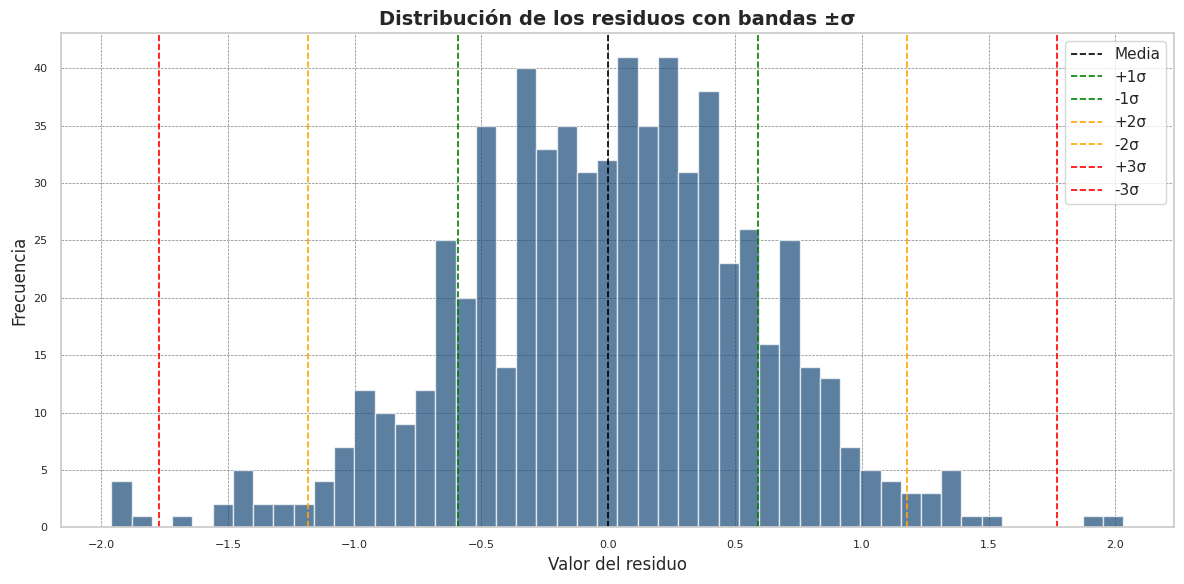

In [204]:

# Visualización
plt.figure()
plt.hist(residuos, bins=50, alpha=0.7,edgecolor='white')
plt.axvline(media, color='black', linestyle='--', label='Media')

# Líneas para ±1σ, ±2σ, ±3σ
for k, color in zip([1, 2, 3], ['green', 'orange', 'red']):
    plt.axvline(media + k * std, color=color, linestyle='--', label=f'+{k}σ')
    plt.axvline(media - k * std, color=color, linestyle='--', label=f'-{k}σ')

plt.title("Distribución de los residuos con bandas ±σ")
plt.xlabel("Valor del residuo")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **Gráfico de Residuos de Modelo Propuesto**

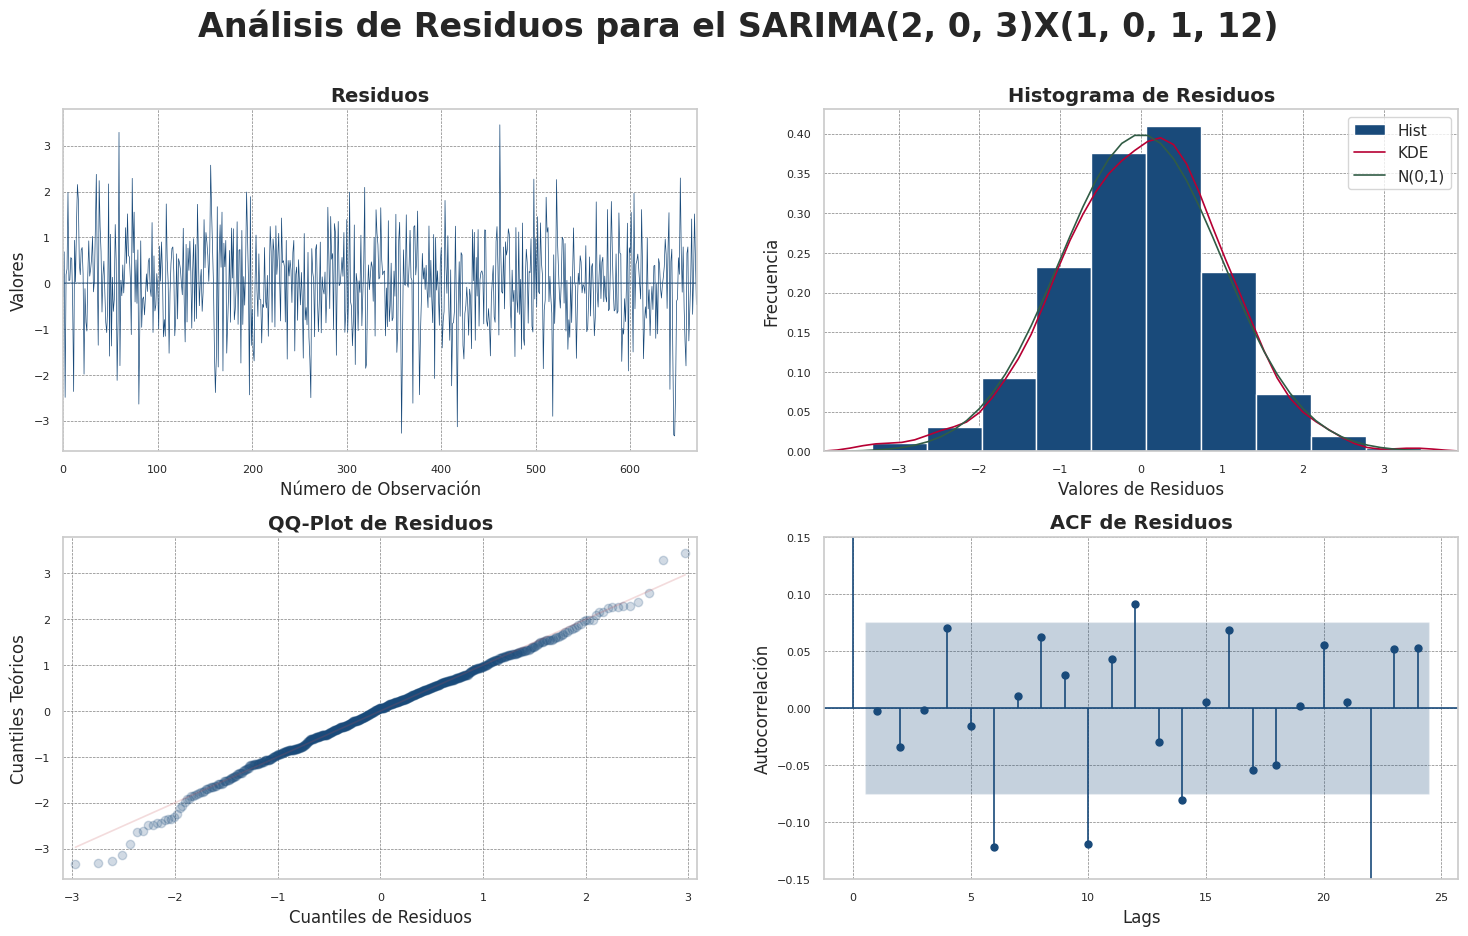

In [ ]:
from matplotlib.collections import PathCollection

fig = modelo.plot_diagnostics(figsize=(18, 10), lags=24)

axes = fig.axes
# Cambiar el primer gráfico a la izquierda
axes[0].set_title("Residuos")
axes[0].set_ylabel("Valores")
axes[0].set_xlabel("Número de Observación")
for line in axes[0].lines:
    line.set_linewidth(0.5)

# Cambiar el segundo gráfico a la derecha
axes[1].set_title("Histograma de Residuos")
axes[1].set_ylabel("Frecuencia")
axes[1].set_xlabel("Valores de Residuos")
# Cambiar el color de las lineas


# Cambiar el tercer gráfico de abajo a la izquierda
axes[2].set_title("QQ-Plot de Residuos")
axes[2].set_ylabel("Cuantiles Teóricos")
axes[2].set_xlabel("Cuantiles de Residuos")
for line in axes[2].lines:
    # line.set_markerfacecolor('green')
    # line.set_markeredgecolor('white')
    line.set_alpha(0.2)

# Cambiar el cuarto gráfico de abajo a la derecha
axes[3].set_title("ACF de Residuos")
axes[3].set_ylabel("Autocorrelación")
axes[3].set_xlabel("Lags")
axes[3].set_ylim(-0.15, 0.15)

plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.suptitle("Análisis de Residuos para el SARIMA(2, 0, 3)X(1, 0, 1, 12)", fontsize=24, fontweight='bold')
plt.savefig('imagenes/05-analisis-de-residuos.svg', bbox_inches='tight')
plt.show()


# **MODELO PROPUESTO**


$$
\text{ARIMA}(2,0,3) \times (1,0,1)_{12}
$$

con los coeficientes:

- AR(1): $\phi_1 = -1.7104$
- AR(2): $\phi_2 = 0.9855$
- MA(1): $\theta_1 = -1.4789$
- MA(2): $\theta_2 = 0.7053$
- MA(3): $\theta_3 = 0.0654$
- AR(12): $\Phi_1 = -0.8782$
- MA(12): $\Theta_1 = -0.8071$
$$
(1
- 1.7104 \, B 
+ 0.9855 \, B^2 
- 0.8782 \, B^{12})W_t=
(1
- 1.4789 \, B 
+ 0.7053 \, B^2 
+ 0.0654 \, B^3
- 0.8071 \, B^{12})\varepsilon_{t}
$$

$W_t = T(X_t)$ con la transformación de Yeo-Johnson y $\varepsilon_t \sim \mathcal{N}(0, 1)$